
# If you face any issue with dry run 
  upgrade pip, scikit-learn, imblearn 
  if youre using conda then upgrade conda --> conda update conda


# do the only if you face issue with precision_recall_curve


In [ ]:
pip install --upgrade scikit-learn


  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.2/11.0 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.0 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/11.0 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.0 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.0 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/11.0 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/11.0 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/11.0 MB 1.6 MB/s eta 0:00:07
   --- -------------

In [ ]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:

pip install --upgrade imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 393.8 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 930.9 kB/s eta 0:00:01
   ---------------------------------- ----- 225.3/258.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.3
    Uninstalling imbalanced-learn-0.12.3:
      Successfully uninstalled imbalanced-learn-0.12.3
Note: you may need to restart the kernel to use updated packages.


# Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score,roc_curve
#from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

# Loading Data

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=12fBlhsa5GIdtme1jT3KlPPIgIdjzqhv1'
df = pd.read_json(url, lines= True,orient='columns')
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:

def label_transform(annotation):
    if 'label' in annotation and isinstance(annotation['label'], list) and len(annotation['label']) > 0:
        if annotation['label'][0] == '1':
            return 1
        else:
            return 0
    return 0
df['annotation'] = df['annotation'].apply(label_transform)


In [ ]:
df.drop(['extras'], axis=1, inplace=True, errors='ignore')
df.to_csv('output.csv', index=False)
df.head(20)

In [ ]:
df.shape

(20001, 2)

# Visualization

<Axes: xlabel='annotation'>

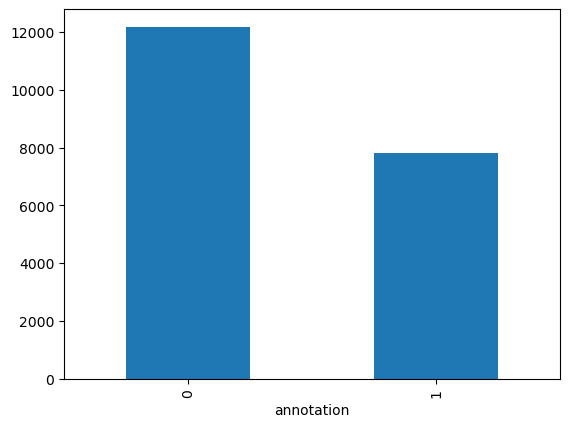

In [ ]:
df['annotation'].value_counts().sort_index().plot.bar()

In [ ]:
#Biasness
print("PosiNon cyber trollingtive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

PosiNon cyber trollingtive:  60.89195540222989 %
Cybertrolling:  39.10804459777012 %


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Define stopwords
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


# Preprocessing

In [ ]:

df['content_without_stopwords'] = df['content'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop])
)

# Remove punctuation
df['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('', x))

# Delete unnecessary columns
del df['content_without_stopwords']
del df['content']
df

,annotation,content_without_puncs
0,1,Get fucking real dude
1,1,dirty come crook Rengel Dems fucking corrupt j...
2,1,fuck up could day too Lets hour Ping later sch...
3,1,Dude dont finish enclosing fucking showers hat...
4,1,WTF talking Men men thats menage thats gay
...,...,...
19996,0,dont complaining going do
19997,0,Bahah yeah im totally gonna get pissed talking...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,Whats something unique Ohio


In [ ]:

porter_stemmer = PorterStemmer()

tok_list = []
size = df.shape[0]

for i in range(size):
    word_data = df['content_without_puncs'].iloc[i]
    nltk_tokens = nltk.word_tokenize(word_data)
    final = ' '.join([porter_stemmer.stem(w) for w in nltk_tokens])
    tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']


In [ ]:
df['content'] = [''.join([char for char in text if not char.isdigit()]) for text in df['content_tokenize']]


In [ ]:

tfIdfVectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df['content'])

In [ ]:
print(tfIdf)
print(tfIdf.shape) # means total rows  20001 with 14783 features

  (0, 4894)	0.3956616014132562
  (0, 4663)	0.3314842764826403
  (0, 10532)	0.6408032598619847
  (0, 3598)	0.5682792040556578
  (1, 4663)	0.1268015531808385
  (1, 3306)	0.303035480523169
  (1, 2453)	0.2062904251423602
  (1, 2791)	0.371987137201958
  (1, 10684)	0.3809181888954825
  (1, 3127)	0.3809181888954825
  (1, 2649)	0.3585202414704814
  (1, 6879)	0.27903636779741225
  (1, 7866)	0.18256718401575606
  (1, 10705)	0.3484616843798271
  (1, 7668)	0.19580922637644363
  (1, 7495)	0.14651869249700017
  (2, 4663)	0.13706177708022613
  (2, 13600)	0.24100884121653016
  (2, 2665)	0.22243490697761542
  (2, 3004)	0.210917296937323
  (2, 13107)	0.22162624148649787
  (2, 7432)	0.24121834450315158
  (2, 5954)	0.28054535378003825
  (2, 9782)	0.3817532412635776
  (2, 7315)	0.3051483463204352
  :	:
  (19997, 12779)	0.15552297680388577
  (19997, 6365)	0.13841622748798188
  (19997, 13158)	0.2251227209207016
  (19997, 9796)	0.2201702624221169
  (19997, 14632)	0.17206392267905224
  (19997, 5037)	0.21340330

In [ ]:
df2 = pd.DataFrame(tfIdf[1].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"]) 
df2 = df2.sort_values('TF-IDF', ascending=False)
print (df2.head(10))

              TF-IDF
dem         0.380918
rengel      0.380918
crook       0.371987
corrupt     0.358520
republican  0.348462
dirti       0.303035
joke        0.279036
come        0.206290
look        0.195809
make        0.182567


In [ ]:
dfx = pd.DataFrame(tfIdf.toarray(), columns=tfIdfVectorizer.get_feature_names_out())
print(dfx)

        aa  aaaaaaaaaa  aaaaaanndgummi  aaaagh  aaaawwwww  aaand  \
0      0.0         0.0             0.0     0.0        0.0    0.0   
1      0.0         0.0             0.0     0.0        0.0    0.0   
2      0.0         0.0             0.0     0.0        0.0    0.0   
3      0.0         0.0             0.0     0.0        0.0    0.0   
4      0.0         0.0             0.0     0.0        0.0    0.0   
...    ...         ...             ...     ...        ...    ...   
19996  0.0         0.0             0.0     0.0        0.0    0.0   
19997  0.0         0.0             0.0     0.0        0.0    0.0   
19998  0.0         0.0             0.0     0.0        0.0    0.0   
19999  0.0         0.0             0.0     0.0        0.0    0.0   
20000  0.0         0.0             0.0     0.0        0.0    0.0   

       aaanyyywhoooooooo  aaargh  aaarrrg  aah  ...  zon  zone  zoo  zoom  \
0                    0.0     0.0      0.0  0.0  ...  0.0   0.0  0.0   0.0   
1                    0.0     

In [ ]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [ ]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

hate                                               Score: 538.7962417948227
fuck                                               Score: 513.2143189179177
damn                                               Score: 486.00305874010667
suck                                               Score: 418.62881387585423
ass                                                Score: 342.64865821300646
lol                                                Score: 301.1363020024677
im                                                 Score: 298.79881196518323
like                                               Score: 294.83676924658744
get                                                Score: 257.3891452004714
that                                               Score: 234.9353085217611
know                                               Score: 215.73765651106038
would                                              Score: 206.70676539440487
you                                                Score: 203.88132706536138
bitc

In [ ]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 14776)
(16000,)
(4001, 14776)
(4001,)


In [ ]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 6250]]


In [ ]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [2429 1572]]


In [ ]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_over.shape)
print(y_over.shape)

(19500, 14776)
(19500,)


In [ ]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 9750]]


# Training and Calculating Scores

In [ ]:
def getStatsFromModel(model): 
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    # Compute Precision-Recall curve
    y_scores = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    
    # Display Precision-Recall curve
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()
    plt.title('2-class Precision-Recall curve')
    plt.show()
    
    # ROC AUC Score
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # ROC Curve Plot
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC.png')
    plt.show()

## Normal Methods

Score: 0.6180954761309673
Confusion Matrix: 
 [[ 932 1497]
 [  31 1541]]
              precision    recall  f1-score   support

           0       0.97      0.38      0.55      2429
           1       0.51      0.98      0.67      1572

    accuracy                           0.62      4001
   macro avg       0.74      0.68      0.61      4001
weighted avg       0.79      0.62      0.60      4001



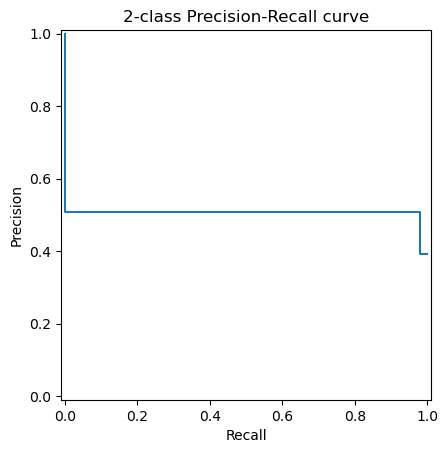

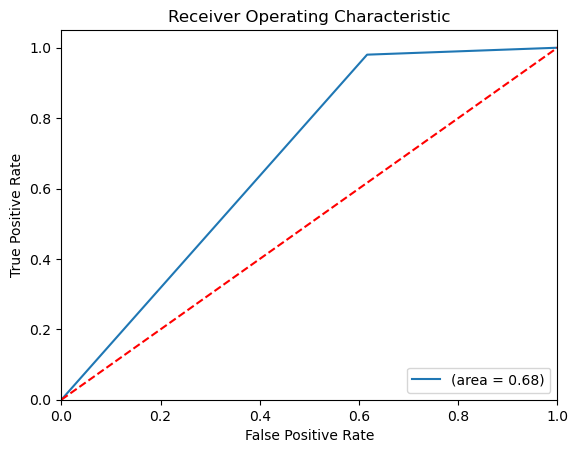

In [ ]:
#Supervised Methods
# 3 normal methods
# 2 ensemble methods
gnb = GaussianNB()
gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict(X_test)
print ("Score:", gnbmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)

Accuracy:  0.8660334916270932
Confusion Matrix: 
 [[1946  483]
 [  53 1519]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      2429
           1       0.76      0.97      0.85      1572

    accuracy                           0.87      4001
   macro avg       0.87      0.88      0.86      4001
weighted avg       0.89      0.87      0.87      4001



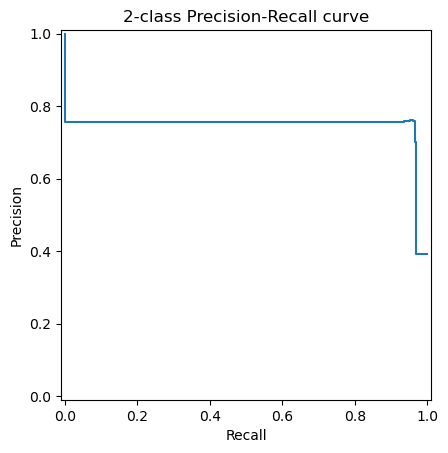

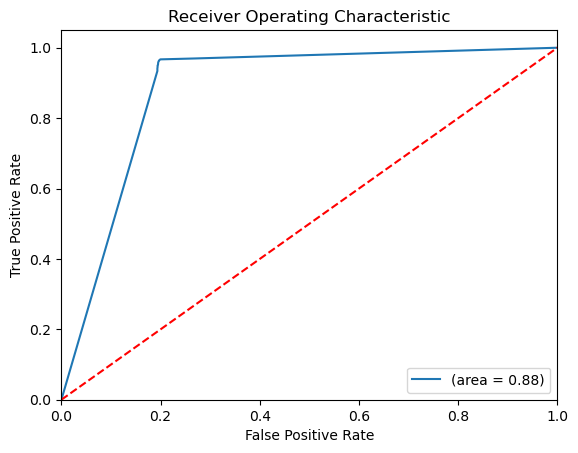

In [ ]:
#adding decision tree 
dtc = DecisionTreeClassifier()
dtc.fit(X_over, y_over)
y_pred = dtc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(dtc)

Accuracy:  0.8082979255186203
Confusion Matrix: 
 [[1939  490]
 [ 277 1295]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      2429
           1       0.73      0.82      0.77      1572

    accuracy                           0.81      4001
   macro avg       0.80      0.81      0.80      4001
weighted avg       0.82      0.81      0.81      4001



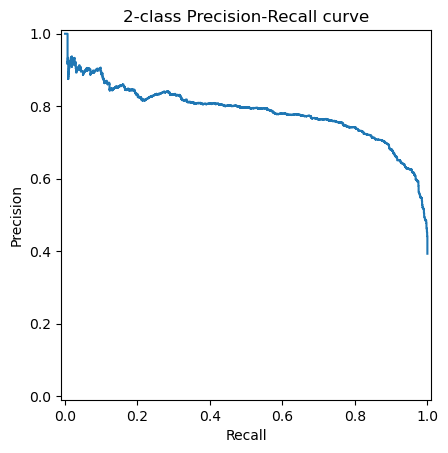

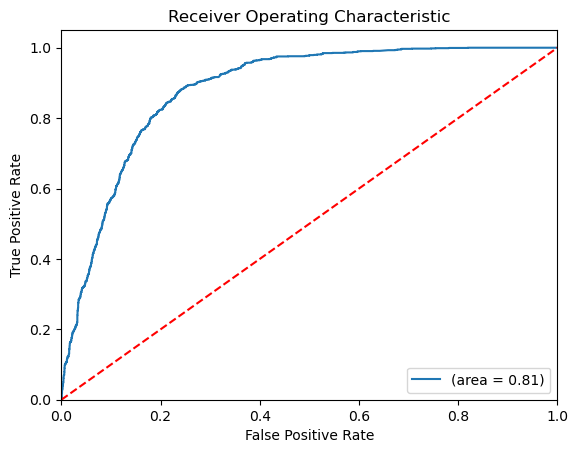

In [ ]:

lgr = LogisticRegression()
lgr.fit(X_over, y_over)
y_pred = lgr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(lgr)

## Ensemble Methods

C:\Users\bharg\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.7178205448637841
Confusion Matrix: 
 [[1878  551]
 [ 578  994]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2429
           1       0.64      0.63      0.64      1572

    accuracy                           0.72      4001
   macro avg       0.70      0.70      0.70      4001
weighted avg       0.72      0.72      0.72      4001



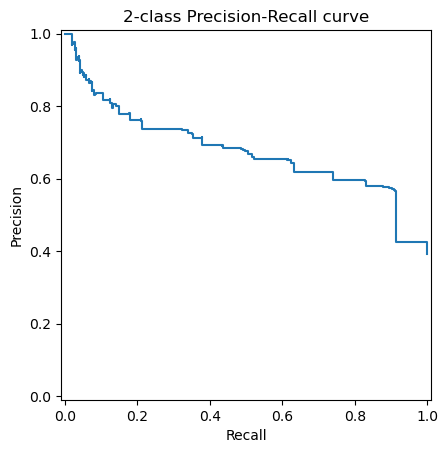

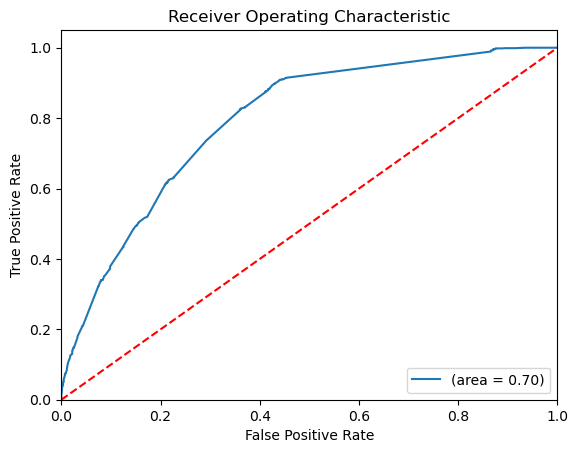

In [ ]:
#Ensemble methods from here 
abc = AdaBoostClassifier() 
abc.fit(X_over, y_over)
y_pred = abc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(abc)

In [ ]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Score:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)

KeyboardInterrupt: 

## Requires High RAM and processing time - Not used

In [ ]:
# Model, SVM
# from sklearn import svm


# clf = svm.SVC(kernel='linear', verbose=True)
# clf.fit(X_over, y_over)
# y_pred = clf.predict(X_test)
# print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# getStatsFromModel(clf)

In [ ]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,10), max_iter=200, verbose=True)
# mlp.fit(X_over,y_over)
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# getStatsFromModel(mlp)